# A joint multilevel model for CAR 
Using MVS.CARLeroux
## Common Markov Gaussian Random Field
 $$ [P , S ] = [P | GMRF_p] [ S | GMRF_s] $$

In [1]:
## Import code:
setwd('/apps/external_plugins/biospytial_rwrapper/biospytial.rwrapper/R/')
rm(list=ls())                                                                                     
source("init_data.R")

Loading required package: MASS
Loading required package: Rcpp

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [13]:
## Extract the response variables
Y = TDF %>% select(Pinophyta,Abies)
## Extract the formula
formula_presence
rhs <- ~ Elevationm + MeanTempm
X <- model.frame(rhs,DataFrame,na.action='na.pass')

species ~ Elevationm + MeanTempm

In [33]:
K = dim(M_bis)[1]
trials <- matrix(rep(1.0,K*2), ncol=2)

In [102]:
burnin = 50000
n.sample = 100000
thin = 50
model3 <- MVS.CARleroux(cbind(Pinophyta,Abies) ~ Elevationm + MeanTempm, 
                        family = 'binomial',
                        trials=trials,
                        W=M_bis,
                        rho = 1,
                        burnin = burnin,
                        n.sample = n.sample,
                        data = DataFrame
                         )

Setting up the model.
Generating 50000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  4379.5 seconds.


In [103]:
## model
model3$modelfit

DIC           p.d          WAIC           p.w          LMPL 
    997.56222     462.96086     980.92609     313.59861    -816.53697 
loglikelihood 
    -35.82025

In [104]:
model3$summary.results

,Median,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
Pinophyta - (Intercept),-11.7569,-21.2189,-8.8901,50000,46.7,12.1,1.3
Pinophyta - Elevationm,0.0002,-0.0005,0.0011,50000,46.7,199.8,0.8
Pinophyta - MeanTempm,-0.0009,-0.0025,0.0000,50000,46.7,82.9,1.9
Abies - (Intercept),-32.1528,-49.5658,-23.3489,50000,46.7,27.6,8.7
Abies - Elevationm,0.0014,-0.0004,0.0038,50000,46.7,371.8,-3.4
Abies - MeanTempm,-0.0006,-0.0028,0.0012,50000,46.7,184.4,1.2
Sigma11,101.4841,56.0898,366.6597,50000,100.0,3.1,-0.8
Sigma22,226.7696,124.2439,618.7947,50000,100.0,3.6,-2.1
rho,1.0000,1.0000,1.0000,NA,NA,NA,NA


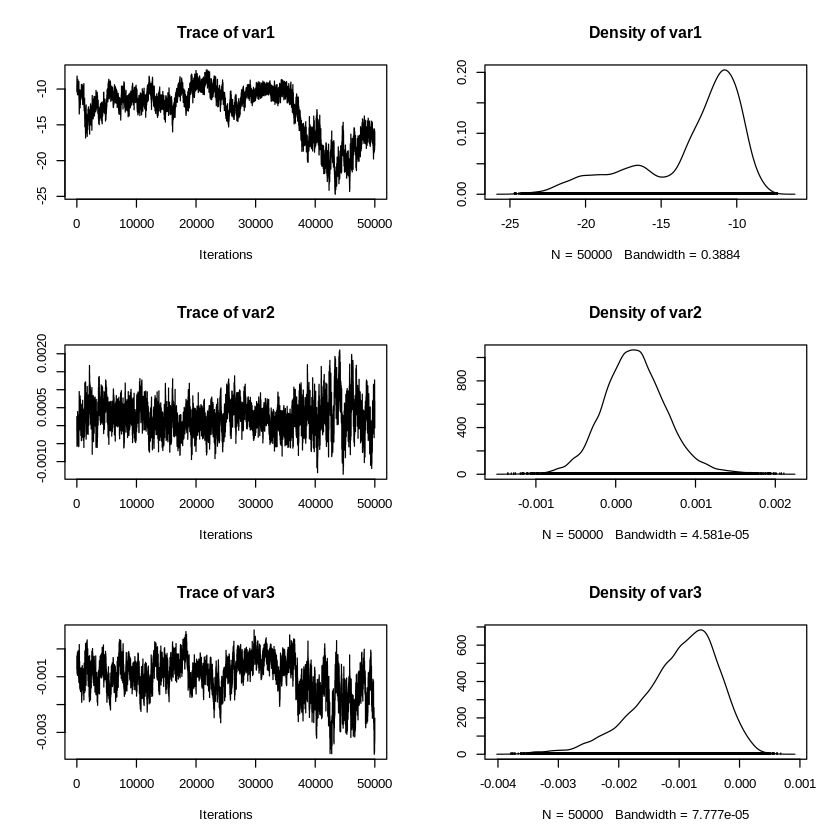

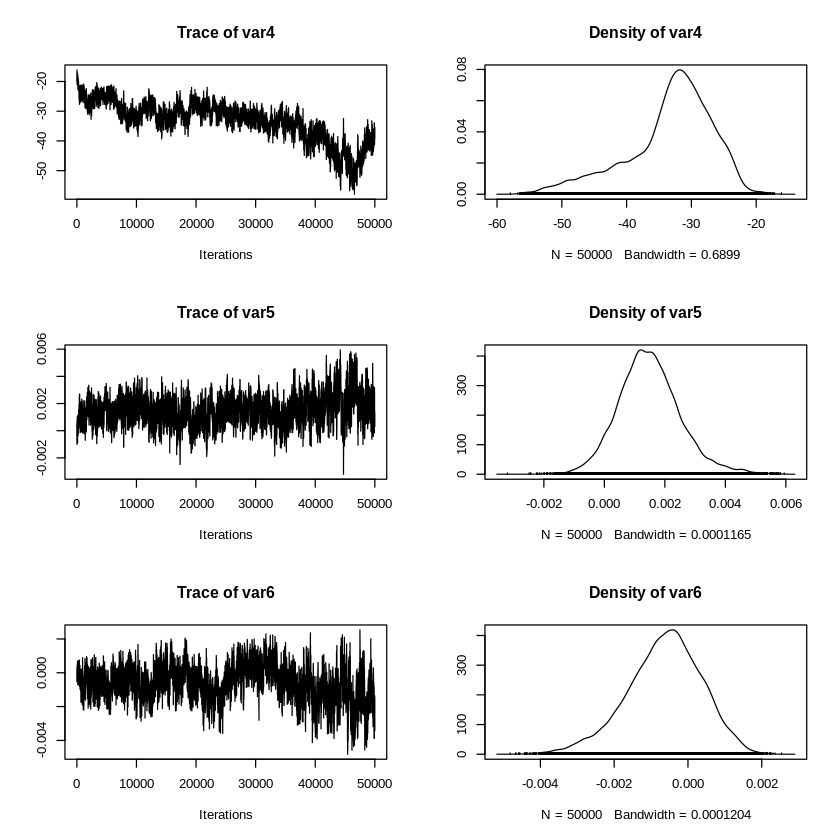

In [105]:
plot(model3$samples$beta)

## Save fitted samples (P,S)

In [106]:
sample_fitted <- t(model3$samples$fitted)
fitted_chain <- cbind(TDF$cellids,sample_fitted)
file2 <- '/outputs/presence_only_models/modelCAR_model3_fitted_sample.csv'
write.csv(fitted_chain,file2)

In [107]:
sample_phi <- t(model3$samples$phi)
nK <- dim(TDF)[1]

S <- sample_phi[1:nK,]
P <- sample_phi[(nK +1) : (2*nK), ]
chain = cbind(TDF$cellids,S)
file_ = '/outputs/presence_only_models/modelCAR_model3_phi_S.csv'
write.csv(chain,file_)
chain = cbind(TDF$cellids,P)
file_ = '/outputs/presence_only_models/modelCAR_model3_phi_P.csv'
write.csv(chain,file_)


 num [1:4060] 5.30e-05 1.89e-05 2.16e-07 2.14e-06 2.15e-06 ...


In [109]:
## P and S
## divide samples for S and P according to the order given up
nK <- dim(TDF)[1]
fitted = model3$fitted.values
S <- fitted[1:nK]
P <- fitted[(nK +1) : (2*nK) ]
chain = cbind(TDF$cellids,S,P)
file_ = '/outputs/presence_only_models/modelCAR_model3_fitted.csv'
write.csv(chain,file_)


In [110]:
str(model3$samples$Sigma)

 num [1:50000, 1:2, 1:2] 60 60.8 58.7 61.4 57.5 ...


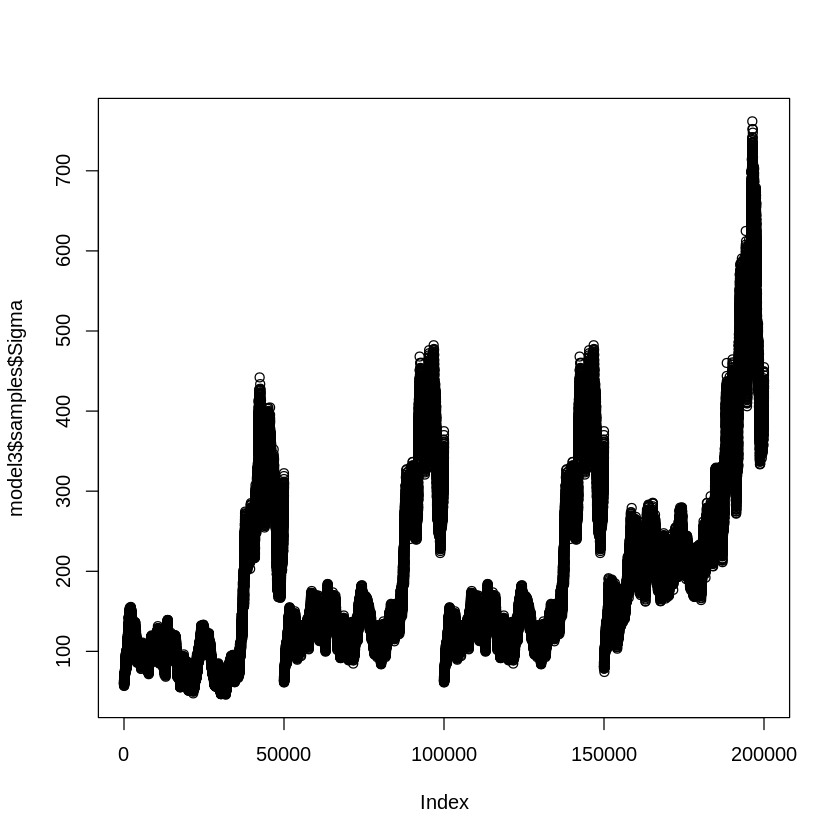

In [111]:
plot(model3$samples$Sigma)